In [20]:
import pandas as pd
import numpy as np
import re
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.pipeline import make_pipeline

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier, plot_importance
import lightgbm as lgb
import joblib 
from matplotlib.pyplot import figure

import eli5
from eli5.sklearn import PermutationImportance
from eli5 import show_prediction

In [2]:
df = pd.read_csv(r'Data/UCI_Credit_Card.csv')

In [3]:
df.PAY_1 = df.PAY_0.copy().rename('PAY_1')

<ipython-input-3-e8cb97142874>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.PAY_1 = df.PAY_0.copy().rename('PAY_1')


C:\Users\Nylle\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PAY_1', ylabel='Density'>

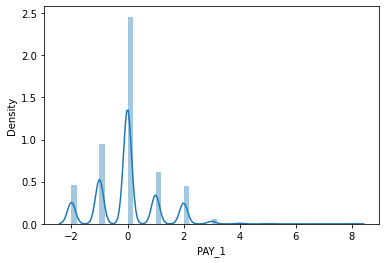

In [4]:
sns.distplot(df.PAY_1)

In [5]:
df.groupby('PAY_0').count()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
PAY_0,,,,,,,,,,,,,,,,,,,,,,,,
-2,2759,2759,2759,2759,2759,2759,2759,2759,2759,2759,2759,2759,2759,2759,2759,2759,2759,2759,2759,2759,2759,2759,2759,2759
-1,5686,5686,5686,5686,5686,5686,5686,5686,5686,5686,5686,5686,5686,5686,5686,5686,5686,5686,5686,5686,5686,5686,5686,5686
0,14737,14737,14737,14737,14737,14737,14737,14737,14737,14737,14737,14737,14737,14737,14737,14737,14737,14737,14737,14737,14737,14737,14737,14737
1,3688,3688,3688,3688,3688,3688,3688,3688,3688,3688,3688,3688,3688,3688,3688,3688,3688,3688,3688,3688,3688,3688,3688,3688
2,2667,2667,2667,2667,2667,2667,2667,2667,2667,2667,2667,2667,2667,2667,2667,2667,2667,2667,2667,2667,2667,2667,2667,2667
3,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322
4,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76
5,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26
6,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11


# PFI - LR 

In [6]:
lr_train = pd.read_csv(r'Data/lr_train.csv')
lr_test = pd.read_csv(r'Data/lr_test.csv')

X_train = lr_train.drop(columns=['default.payment.next.month'])
y_train = lr_train[['default.payment.next.month']].values

X_test = lr_test.drop(columns=['default.payment.next.month'])
y_test = lr_test[['default.payment.next.month']].values

lr_model = joblib.load('logreg.sav')
lr_model.fit(X_train, y_train)

C:\Users\Nylle\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Pipeline(steps=[('scaler', StandardScaler()),
                ('lr', LogisticRegression(random_state=42))])

    Importance      Feature  Magnitude
1     0.100972        PAY_1   0.100972
39    0.038084  LIMIT_UTIL1   0.038084
11    0.018594    BILL_AMT5   0.018594
12    0.014589    BILL_AMT6   0.014589
47    0.009985  LIMIT_UTIL5   0.009985


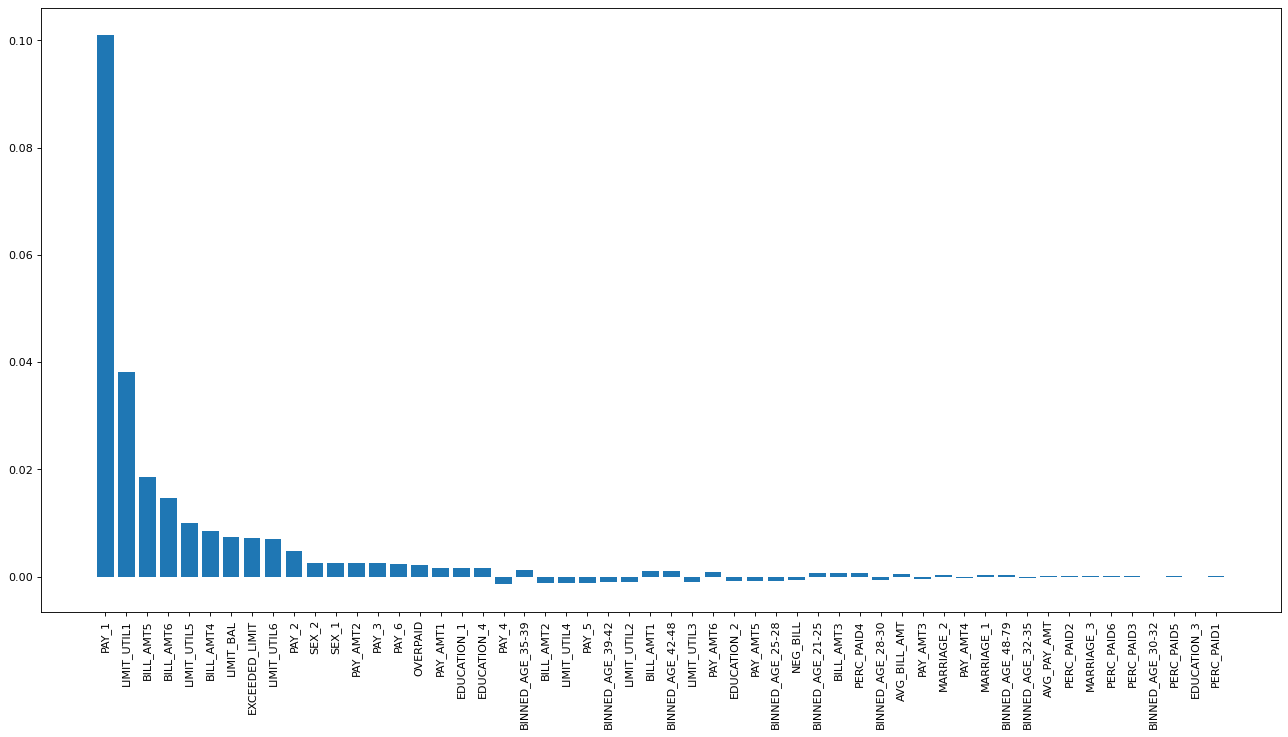

In [7]:
pfi_lr = permutation_importance(lr_model, X_test, y_test, scoring='f1', n_repeats=30, random_state=42)

importance_lr = pd.DataFrame(pfi_lr.importances_mean, columns=['Importance'])
importance_lr['Feature'] = X_train.columns
importance_lr['Magnitude'] = abs(importance_lr['Importance'].copy())
importance_lr = importance_lr.sort_values('Magnitude', ascending=False)

print(importance_lr.head())

figure(figsize=(20, 10), dpi=80)
plt.bar(importance_lr.Feature, importance_lr.Importance)
plt.xticks(rotation=90)
plt.show()

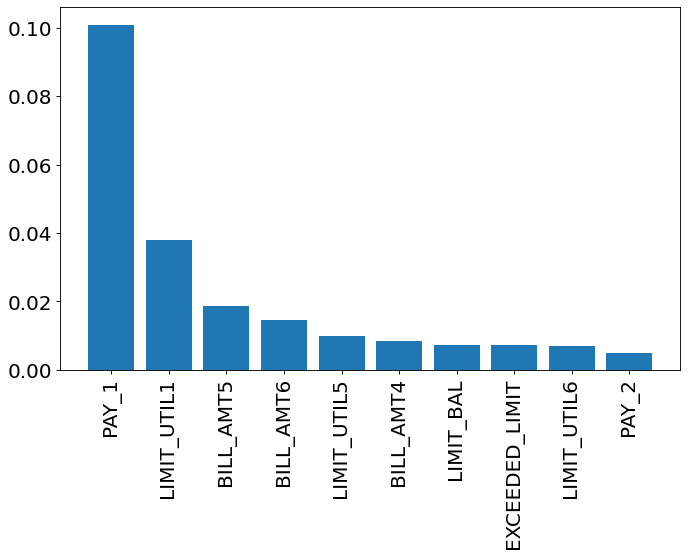

In [8]:
figure(figsize=(10, 6), dpi=80)
plt.bar(importance_lr.Feature[:10], importance_lr.Importance[:10])
plt.xticks(rotation=90)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

In [9]:
eli5.show_weights(lr_model, feature_names = X_test.columns.tolist())

Weight?,Feature
+0.677,PAY_1
+0.310,BILL_AMT5
+0.177,LIMIT_UTIL6
+0.157,PAY_2
+0.099,PAY_3
+0.075,EXCEEDED_LIMIT
+0.068,LIMIT_UTIL3
+0.066,LIMIT_UTIL2
+0.064,PAY_4
+0.058,LIMIT_UTIL4


# PFI - RF

In [10]:
rf_train = pd.read_csv(r'Data/rf_train.csv')
rf_test = pd.read_csv(r'Data/rf_test.csv')

X_train = rf_train.drop(columns=['default.payment.next.month'])
y_train = rf_train[['default.payment.next.month']].values

X_test = rf_test.drop(columns=['default.payment.next.month'])
y_test = rf_test[['default.payment.next.month']].values

rf_model = joblib.load('rf.sav')
rf_model.fit(X_train, y_train)

C:\Users\Nylle\anaconda3\lib\site-packages\imblearn\pipeline.py:281: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, yt, **fit_params)


Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestClassifier(criterion='entropy', max_depth=8,
                                        min_samples_split=4, random_state=7))])

    Importance      Feature  Magnitude
1     0.072638        PAY_1   0.072638
2     0.016439        PAY_2   0.016439
4     0.002437        PAY_4   0.002437
3     0.002395        PAY_3   0.002395
38   -0.002168  AVG_PAY_AMT   0.002168


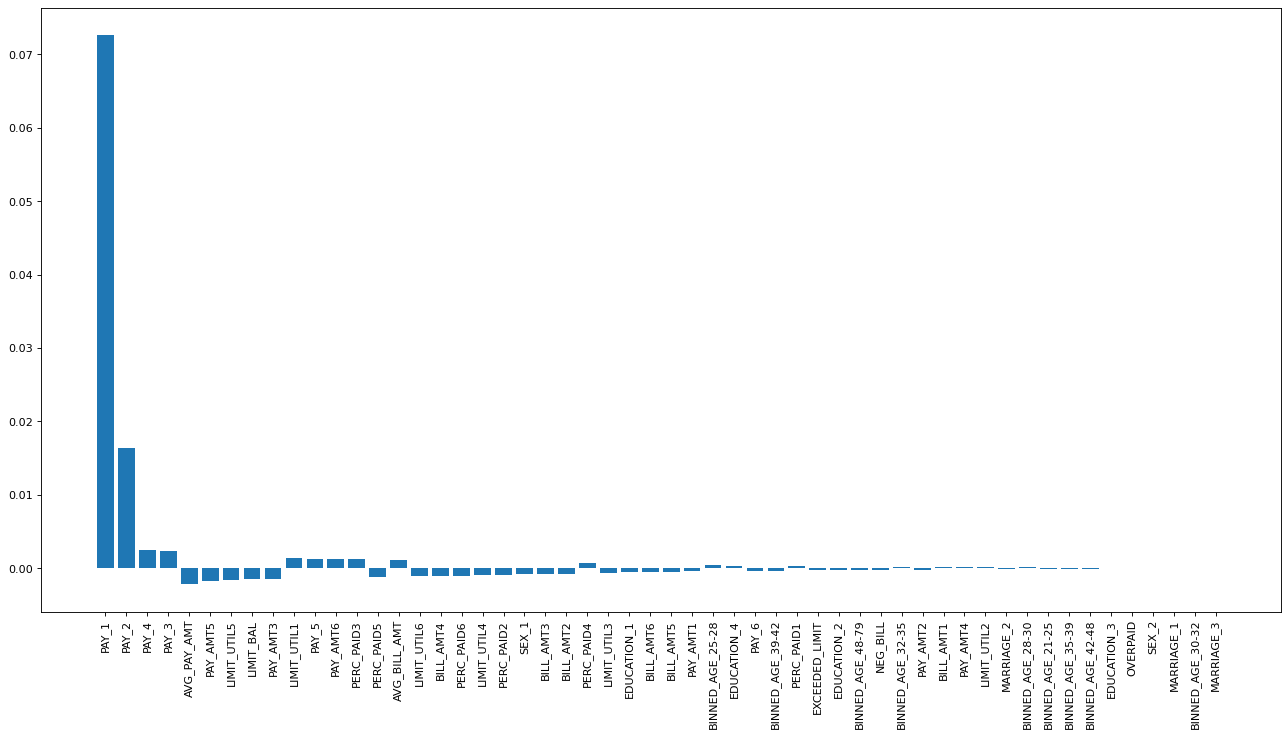

In [11]:
pfi_rf = permutation_importance(rf_model, X_test, y_test, scoring='f1', n_repeats=30, random_state=42)

importance_rf = pd.DataFrame(pfi_rf.importances_mean, columns=['Importance'])
importance_rf['Feature'] = X_train.columns
importance_rf['Magnitude'] = abs(importance_rf['Importance'].copy())
importance_rf = importance_rf.sort_values('Magnitude', ascending=False)

print(importance_rf.head())

figure(figsize=(20, 10), dpi=80)
plt.bar(importance_rf.Feature, importance_rf.Importance)
plt.xticks(rotation=90)
plt.show()

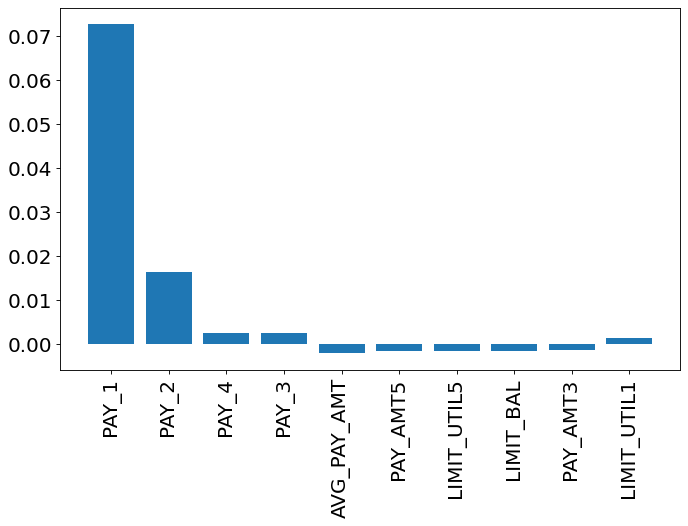

In [12]:
figure(figsize=(10, 6), dpi=80)
plt.bar(importance_rf.Feature[:10], importance_rf.Importance[:10])
plt.xticks(rotation=90)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

In [13]:
eli5.show_weights(rf_model, feature_names = X_test.columns.tolist())

Weight,Feature
0.2262 ± 0.2965,PAY_1
0.1131 ± 0.2591,PAY_2
0.0660 ± 0.1958,PAY_3
0.0518 ± 0.1603,PAY_4
0.0437 ± 0.1476,PAY_5
0.0372 ± 0.0721,AVG_PAY_AMT
0.0278 ± 0.0521,PAY_AMT2
0.0261 ± 0.0540,PAY_AMT1
0.0248 ± 0.1063,PAY_6
0.0248 ± 0.0547,LIMIT_BAL


# PFI - XGB

In [14]:
xgb_train = pd.read_csv(r'Data/cc_train.csv')
xgb_test = pd.read_csv(r'Data/cc_test.csv')

X_train = xgb_train.drop(columns=['default.payment.next.month'])
y_train = xgb_train[['default.payment.next.month']].values

X_test = xgb_test.drop(columns=['default.payment.next.month'])
y_test = xgb_test[['default.payment.next.month']].values

xgb_model = joblib.load('xgb.sav')
xgb_model.fit(X_train, y_train)

C:\Users\Nylle\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Nylle\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[19:51:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_child_weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:51:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('scaler', StandardScaler()),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=2.212626851837828,
                               gpu_id=-1, importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.022713751443330703,
                               max_delta_step=0, max_depth=8,
                               min_child_weight=1,
                               min_child_weights=1.8717298505312536,
                               missing=nan, monotone_constraints='()',
                               n_estimators=500, n_jobs=16, num_parallel_tree=1,
                               random_state=0, reg_alpha=0.0190204198581071,
                               reg_lambda=0.0927534352370206,
                               scale_pos_weight=1, s

    Importance      Feature  Magnitude
1     0.212604        PAY_1   0.212604
6     0.018589        PAY_6   0.018589
39    0.018426  LIMIT_UTIL1   0.018426
2     0.016327        PAY_2   0.016327
38    0.011060  AVG_PAY_AMT   0.011060


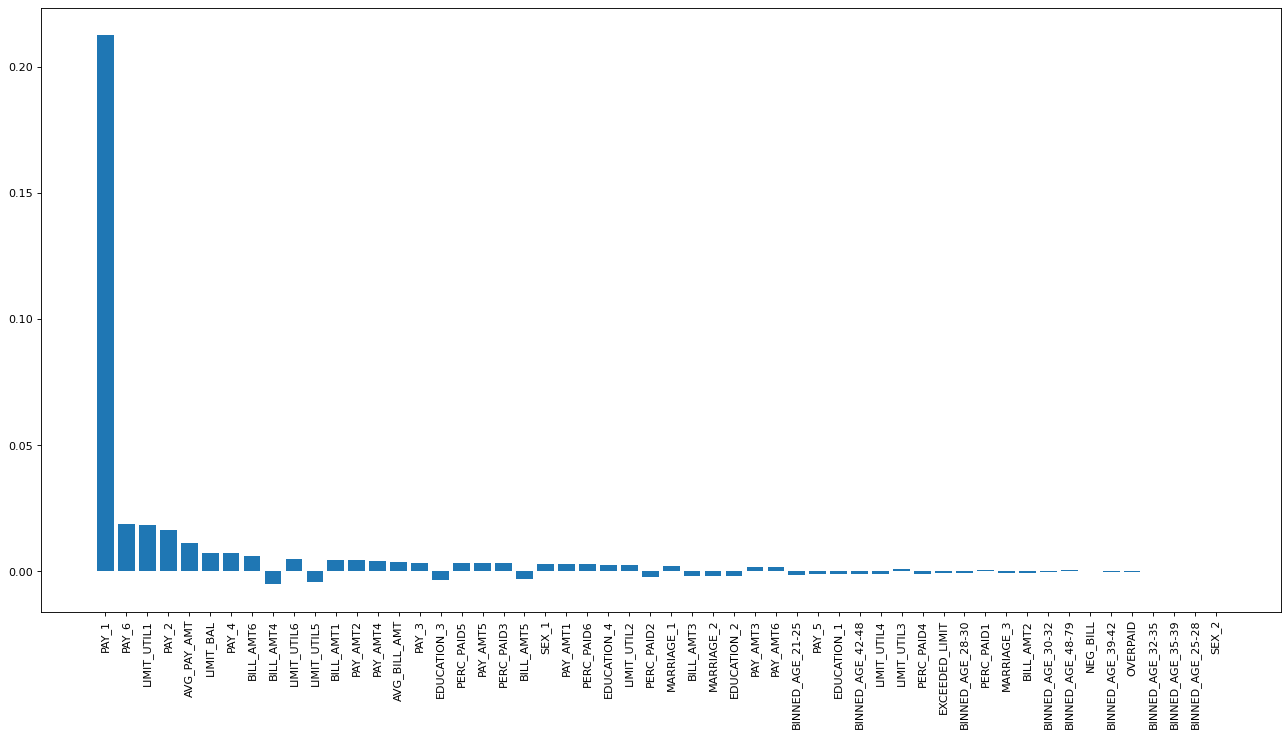

In [15]:
pfi_xgb = permutation_importance(xgb_model, X_test, y_test, scoring='f1', n_repeats=30, random_state=42)

importance_xgb = pd.DataFrame(pfi_xgb.importances_mean, columns=['Importance'])
importance_xgb['Feature'] = X_train.columns
importance_xgb['Magnitude'] = abs(importance_xgb['Importance'].copy())
importance_xgb = importance_xgb.sort_values('Magnitude', ascending=False)

print(importance_xgb.head())

figure(figsize=(20, 10), dpi=80)
plt.bar(importance_xgb.Feature, importance_xgb.Importance)
plt.xticks(rotation=90)
plt.show()

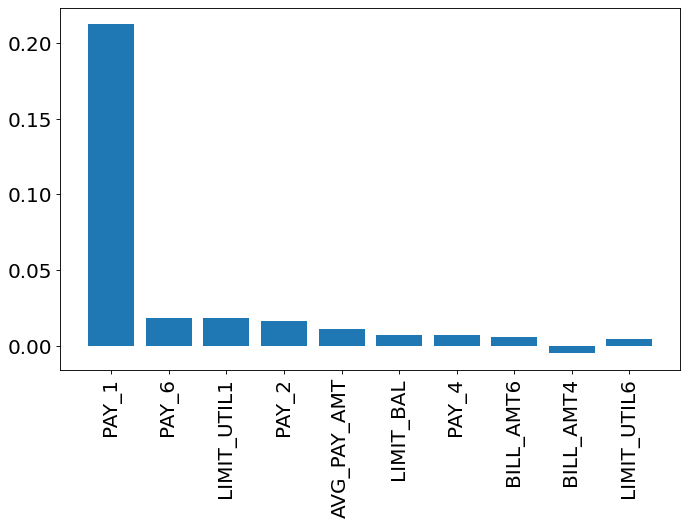

In [16]:
figure(figsize=(10, 6), dpi=80)
plt.bar(importance_xgb.Feature[:10], importance_xgb.Importance[:10])
plt.xticks(rotation=90)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

In [17]:
eli5.show_weights(xgb_model, feature_names = X_test.columns.tolist())

Weight,Feature
0.2998,PAY_1
0.0995,PAY_2
0.0278,PAY_4
0.0240,PAY_3
0.0181,AVG_PAY_AMT
0.0179,PAY_6
0.0147,PAY_5
0.0143,AVG_BILL_AMT
0.0139,PAY_AMT2
0.0129,LIMIT_BAL
